In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [3]:
company = "ITC.NS"
start  = "2023-01-01"
end = "2023-09-12"

In [4]:
data = yf.download(company, start, end)
df = data.copy()
df = df.reset_index()
df["Day"] = df["Date"].dt.day_name()

[*********************100%%**********************]  1 of 1 completed


In [5]:
column_to_move = df.pop("Day")
df.insert(1, "Day",column_to_move)
df.head(5)

,Date,Day,Open,High,Low,Close,Adj Close,Volume
0,2023-01-02,Monday,330.899994,334.000000,329.649994,332.850006,325.675659,5951893
1,2023-01-03,Tuesday,331.500000,333.350006,330.250000,331.100006,323.963409,5997051
2,2023-01-04,Wednesday,331.850006,332.500000,326.000000,327.000000,319.951752,6689769
3,2023-01-05,Thursday,328.649994,333.899994,328.200012,333.450012,326.262756,8171437
4,2023-01-06,Friday,334.700012,337.549988,333.100006,335.049988,327.828247,8284135


In [6]:
df_filtered = df[:19]

In [ ]:
green_df = df_filtered[df.Close > df.Open].copy()
red_df = df_filtered[df.Close < df.Open].copy()
green_df["Height"] = green_df["Close"] - green_df["Open"]
red_df["Height"] = red_df["Open"] - red_df["Close"]

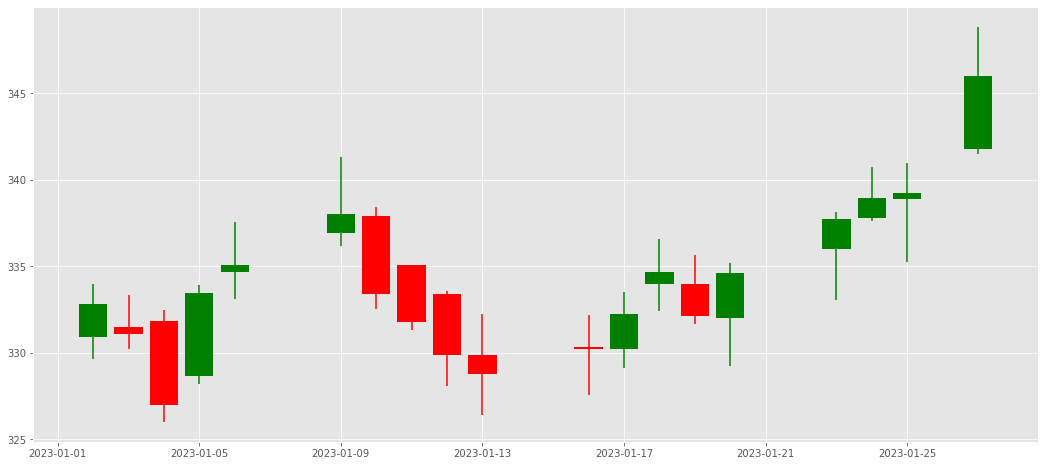

In [10]:
fig = plt.figure(figsize=(18,8))
plt.vlines(x=red_df["Date"], ymin=red_df["Low"], ymax=red_df["High"], colors="red")
plt.vlines(x=green_df["Date"], ymin=green_df["Low"], ymax=green_df["High"], colors="green")
plt.bar(x=green_df["Date"], height=green_df["Height"], bottom=green_df["Open"], color="green")
plt.bar(x=red_df["Date"], height=red_df["Height"], bottom=red_df["Close"], color="red")
plt.show()
# plt.savefig("../plots/ITC_candlesticks.png", dpi=400)